# Описание датасета о подержанных автомобилях Audi

## Предметная область
Анализ рынка подержанных автомобилей, с фокусом на марке Audi. Данные могут помочь в исследовании ценообразования и предпочтений потребителей.

## Источник данных
Датасет доступен на платформе Kaggle, что обеспечивает его надежность и актуальность.

## Характер данных
Данные являются реальными, собранными с площадок продаж автомобилей.

## Атрибуты датасета
1. **model** (строковый): Название модели автомобиля.
2. **year** (числовой): Год выпуска автомобиля.
3. **mileage** (числовой): Пробег автомобиля в километрах.
4. **price** (числовой): Цена автомобиля в евро.
5. **fuel** (строковый): Тип топлива (бензин, дизель и т.д.).
6. **color** (строковый): Цвет автомобиля.

## Описание задачи анализа
Цель анализа — исследовать влияние различных атрибутов на цену автомобилей и выявить возможные паттерны.

https://www.kaggle.com/datasets/mysarahmadbhat/audi-used-car-listings?resource=download

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('D:\\Downloads\\archive\\audi.csv')

In [86]:
df.head()       # первые строки таблицы
df.info()       # информация о типах данных и пропущенных значениях
df.describe()   # базовые статистики для числовых данных


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


1. Основные статистические показатели и визуализация распределения

Среднее значение и стандартное отклонение: Вычислите среднее значение, медиану, стандартное отклонение для каждого числового столбца, чтобы понять центральное положение и разброс данных.

In [87]:
# Вычисление среднего значения и стандартного отклонения для числовых столбцов
numeric_df = df.select_dtypes(include=[np.number])
mean_values = numeric_df.mean()
std_dev_values = numeric_df.std()

print("Средние значения:\n", mean_values)
print("\nСтандартные отклонения:\n", std_dev_values)



Средние значения:
 year           2017.100675
price         22896.685039
mileage       24827.244001
tax             126.011436
mpg              50.770022
engineSize        1.930709
dtype: float64

Стандартные отклонения:
 year              2.167494
price         11714.841888
mileage       23505.257205
tax              67.170294
mpg              12.949782
engineSize        0.602957
dtype: float64


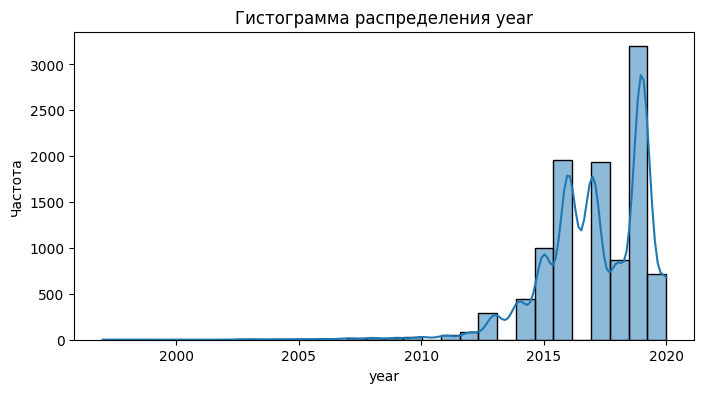

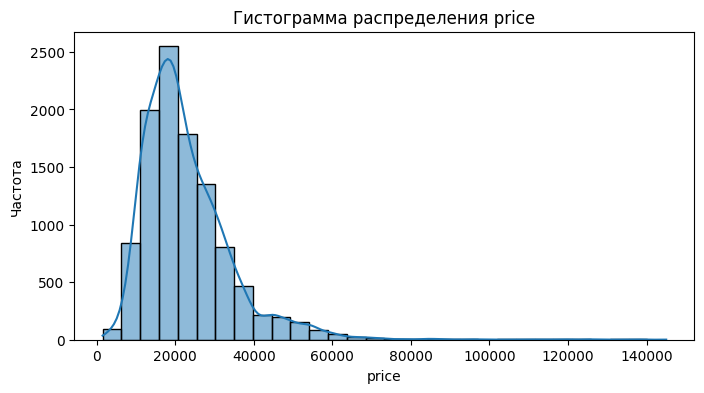

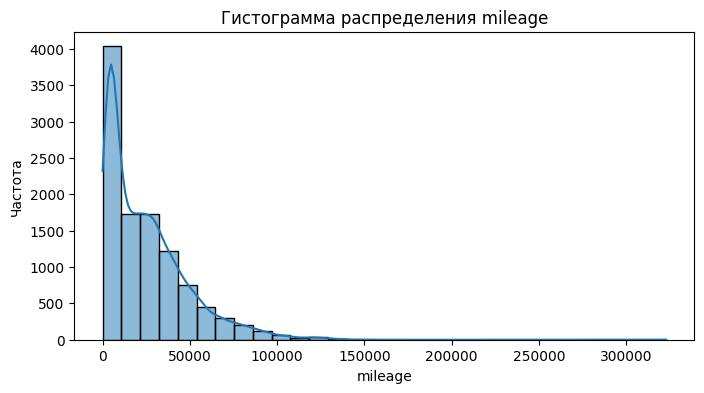

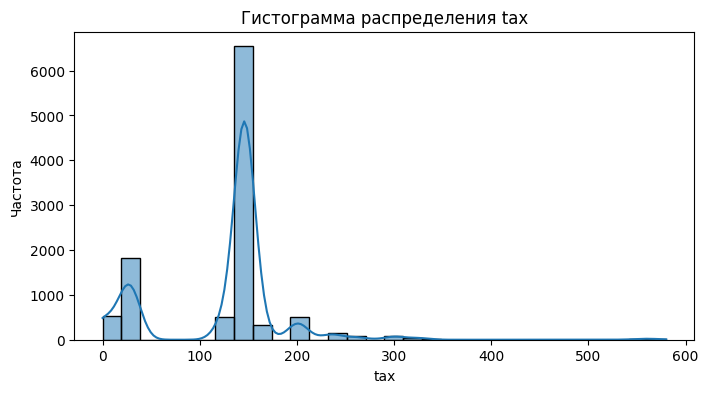

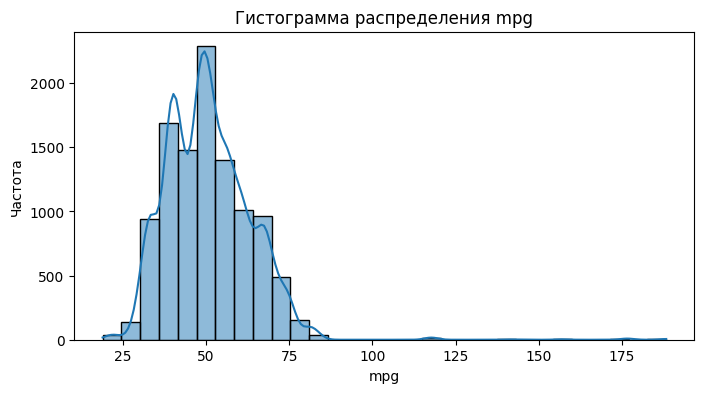

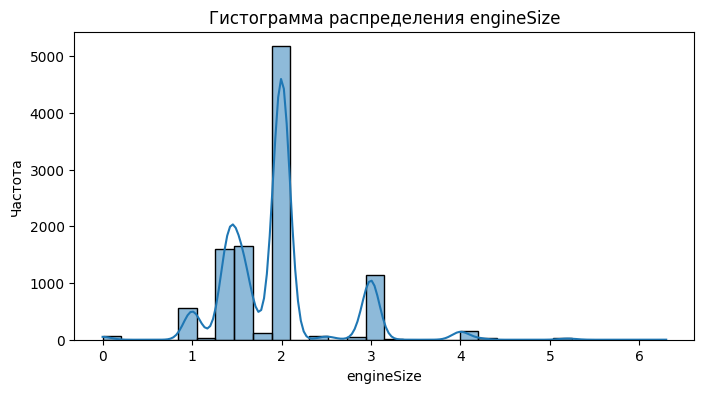

In [88]:
# Построение гистограммы для каждого числового атрибута
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Гистограмма распределения {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

Поиск выбросов с помощью межквартильного размаха (IQR). Это дополнительно позволит понять, насколько выбросы значительны и как их обработать

In [89]:
for col in ['price', 'mileage']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Количество выбросов в {col}: {len(outliers)}')



Количество выбросов в price: 443
Количество выбросов в mileage: 324


Визуализация выбросов с использованием PairPlot: Этот график хорошо показывает выбросы в сочетании атрибутов. Он позволяет понять, как связаны параметры друг с другом и с выбросами.

Text(0.5, 1.02, 'Пары атрибутов с KDE')

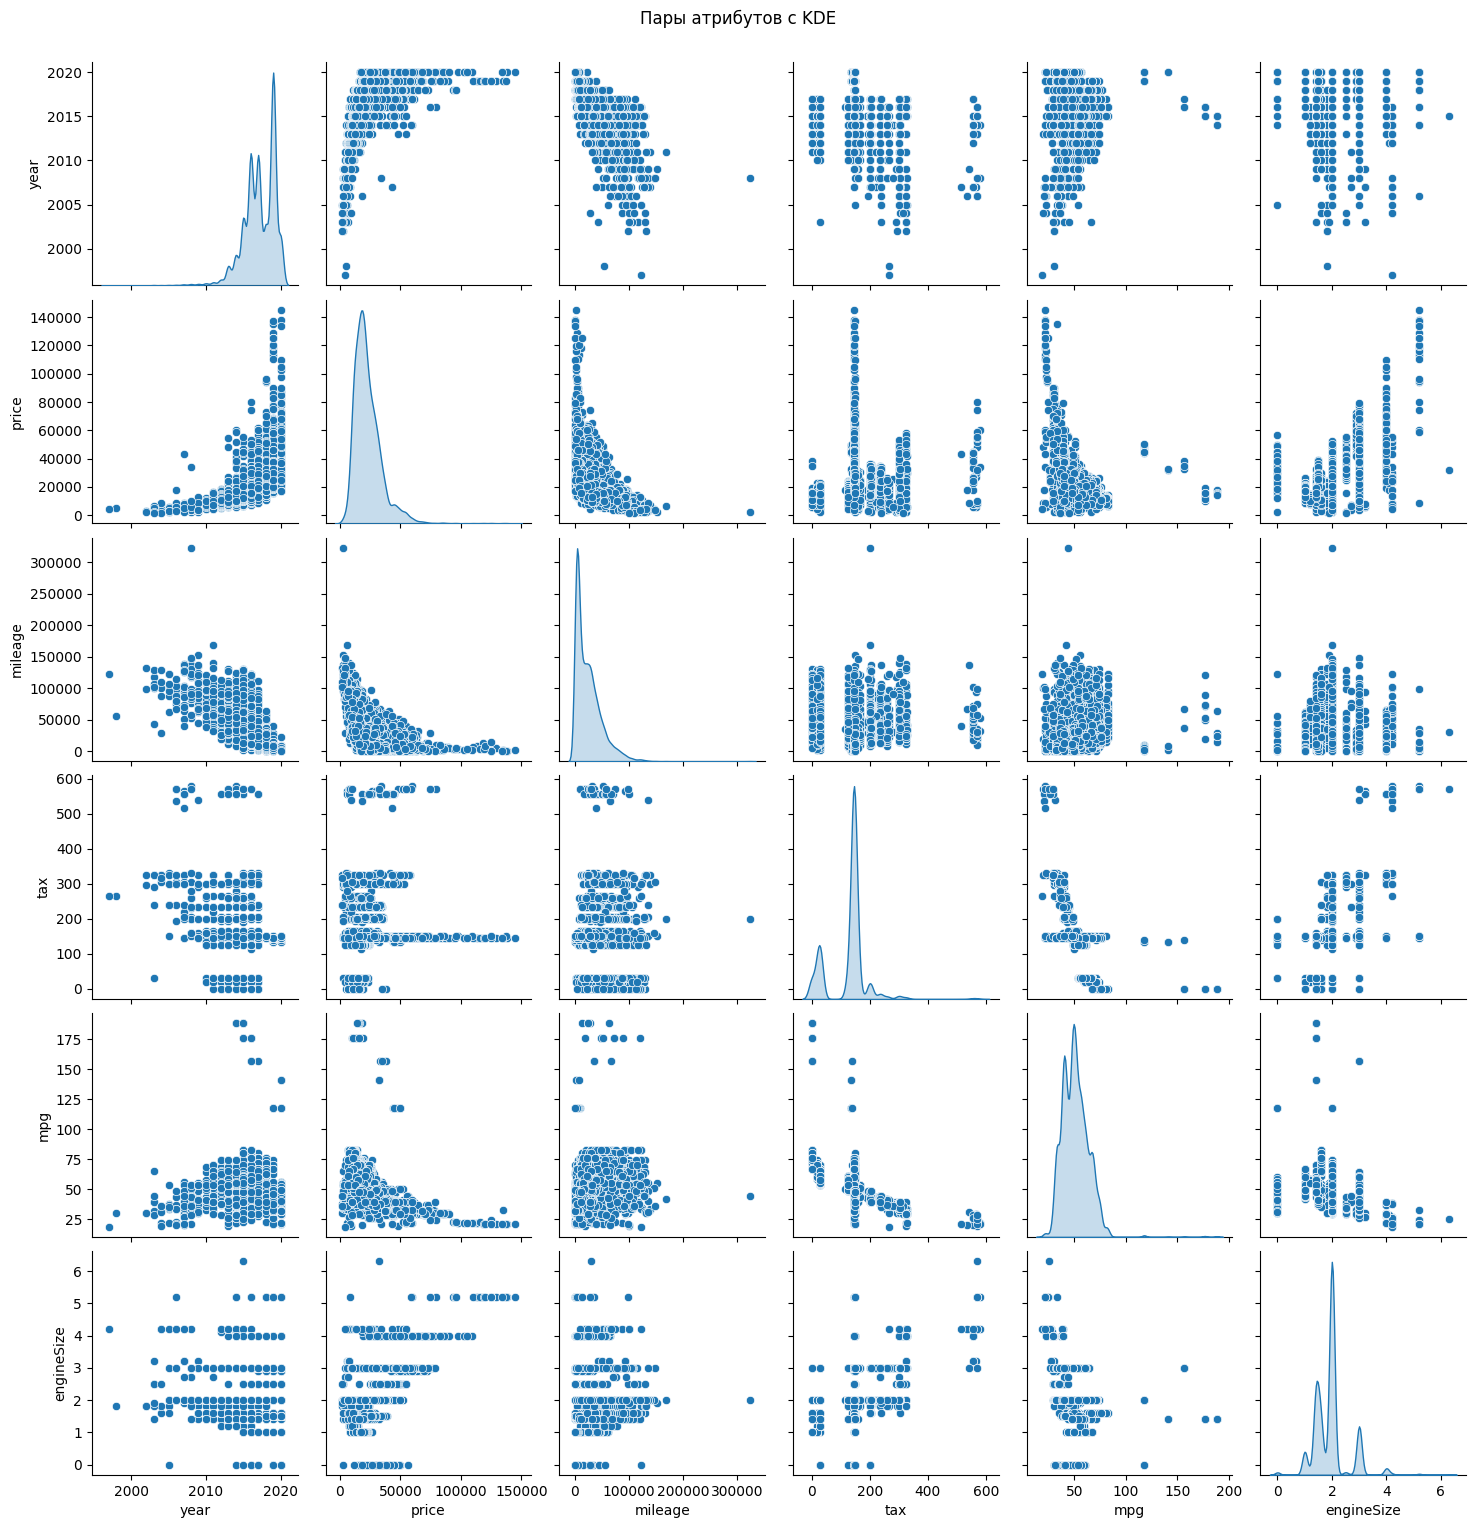

In [90]:
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Пары атрибутов с KDE", y=1.02)


In [91]:
# Проверка на пропущенные значения
missing_values = df.isnull().sum()
print("Пропущенные значения:\n", missing_values)


Пропущенные значения:
 model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


Обработка пропущенных значений
Варианты обработки пропущенных значений могут включать:

Заполнение средним значением, медианой или модой.
Удаление строк или столбцов с пропущенными значениями.
Использование методов интерполяции для заполнения пропусков.

In [92]:
# Заполнение пропущенных значений средним значением
print(df.dtypes)
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].fillna(df['price'].median(), inplace=True)  # либо используйте dropna()



model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


Графики распределения по категориям (например, модель или год выпуска): Это поможет проанализировать, как цены и другие атрибуты распределяются в разрезе разных категорий.

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, ' A1'),
  Text(1, 0, ' A6'),
  Text(2, 0, ' A4'),
  Text(3, 0, ' A3'),
  Text(4, 0, ' Q3'),
  Text(5, 0, ' Q5'),
  Text(6, 0, ' A5'),
  Text(7, 0, ' S4'),
  Text(8, 0, ' Q2'),
  Text(9, 0, ' A7'),
  Text(10, 0, ' TT'),
  Text(11, 0, ' Q7'),
  Text(12, 0, ' RS6'),
  Text(13, 0, ' RS3'),
  Text(14, 0, ' A8'),
  Text(15, 0, ' Q8'),
  Text(16, 0, ' RS4'),
  Text(17, 0, ' RS5'),
  Text(18, 0, ' R8'),
  Text(19, 0, ' SQ5'),
  Text(20, 0, ' S8'),
  Text(21, 0, ' SQ7'),
  Text(22, 0, ' S3'),
  Text(23, 0, ' S5'),
  Text(24, 0, ' A2'),
  Text(25, 0, ' RS7')])

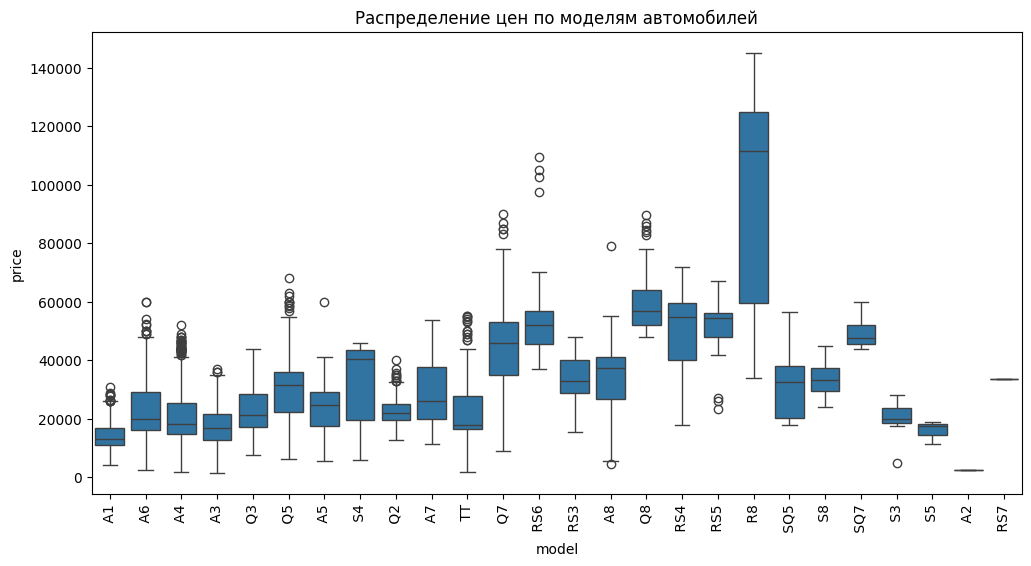

In [93]:
plt.figure(figsize=(12,6))
sns.boxplot(x='model', y='price', data=df)
plt.title("Распределение цен по моделям автомобилей")
plt.xticks(rotation=90)


Чтобы проанализировать, какие параметры высоко коррелируют между собой, мы используем коэффициент корреляции Пирсона. Он показывает линейную связь между числовыми атрибутами: значения, близкие к ±1, указывают на сильную корреляцию, а значения около 0 указывают на слабую или отсутствующую корреляцию.

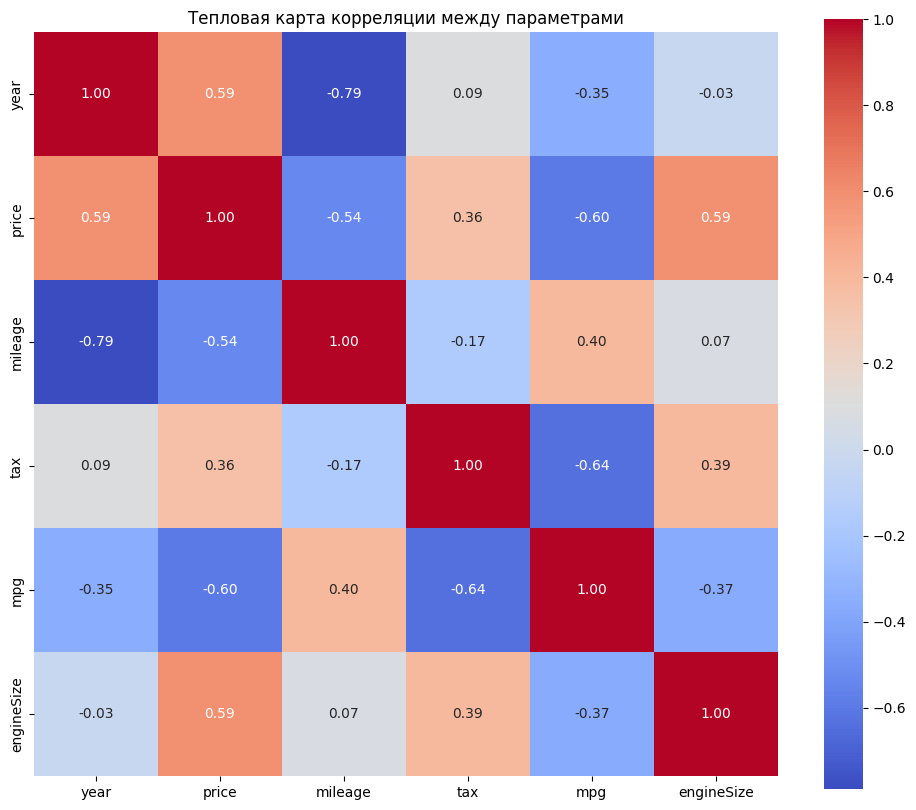

In [94]:
# Создание таблицы корреляции
correlation_matrix = numeric_df.corr()

# Визуализация корреляции с помощью тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Тепловая карта корреляции между параметрами")
plt.show()


Теперь выделим атрибуты с высокой корреляцией (например, |корреляция| > 0.7) и атрибуты, где корреляция практически отсутствует (|корреляция| < 0.1)

In [95]:
# Задаем порог корреляции для выделения значимых связей
high_corr_threshold = 0.7
high_corr_pairs = []

for i in correlation_matrix.columns:
    for j in correlation_matrix.columns:
        if i != j and abs(correlation_matrix.loc[i, j]) > high_corr_threshold:
            high_corr_pairs.append((i, j, correlation_matrix.loc[i, j]))

# Вывод таблицы высококоррелированных пар
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Attribute 1', 'Attribute 2', 'Correlation'])
print("Высококоррелированные пары атрибутов:")
display(high_corr_df)


Высококоррелированные пары атрибутов:


,Attribute 1,Attribute 2,Correlation
0,year,mileage,-0.789667
1,mileage,year,-0.789667


Для каждой найденной пары можно построить график рассеивания

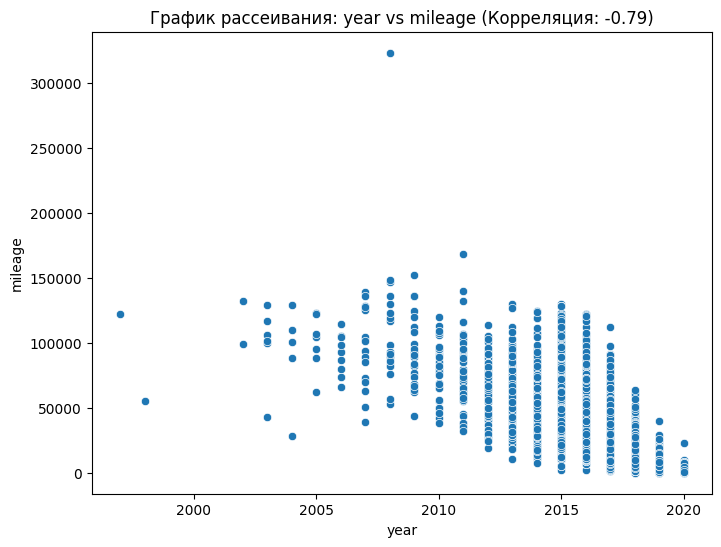

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('D:\\Downloads\\archive\\audi.csv')

# Выбираем только числовые столбцы
numeric_data = data.select_dtypes(include=[np.number])

# Шаг 1: Вычисление корреляционной матрицы для числовых данных
correlation_matrix = numeric_data.corr()

# Шаг 2: Извлечение пар атрибутов с высокой корреляцией (например, выше 0.7 или ниже -0.7)
high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Attribute 1', 'Attribute 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'].abs() > 0.7) & (high_corr_pairs['Attribute 1'] != high_corr_pairs['Attribute 2'])]

# Удаление дубликатов (пар, представленных дважды)
high_corr_pairs['Ordered Pair'] = high_corr_pairs.apply(lambda x: tuple(sorted([x['Attribute 1'], x['Attribute 2']])), axis=1)
high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Ordered Pair']).drop(columns=['Ordered Pair'])

# Шаг 3: Построение графиков рассеивания для каждой высококоррелированной пары
for index, row in high_corr_pairs.iterrows():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=row['Attribute 1'], y=row['Attribute 2'])
    plt.title(f"График рассеивания: {row['Attribute 1']} vs {row['Attribute 2']} (Корреляция: {row['Correlation']:.2f})")
    plt.xlabel(row['Attribute 1'])
    plt.ylabel(row['Attribute 2'])
    plt.show()


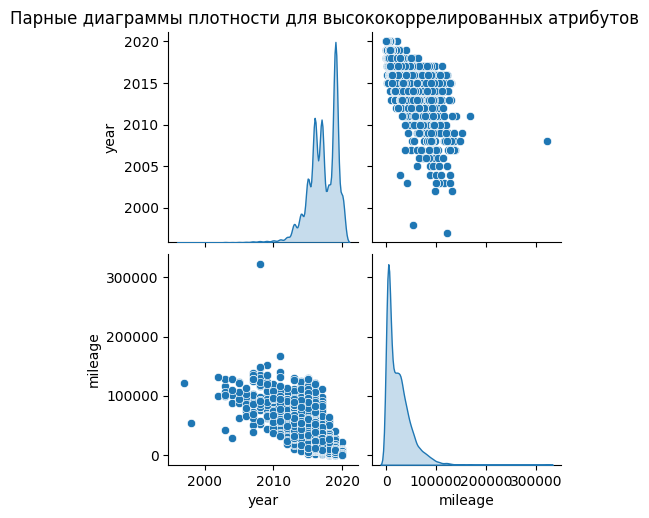

In [97]:
sns.pairplot(numeric_df, vars=high_corr_df['Attribute 1'].unique(), diag_kind='kde')
plt.suptitle("Парные диаграммы плотности для высококоррелированных атрибутов", y=1.02)
plt.show()

Чтобы глубже понять взаимосвязи, создадим матрицу графиков рассеивания (scatter matrix), которая позволяет визуально оценить зависимость между парами переменных.


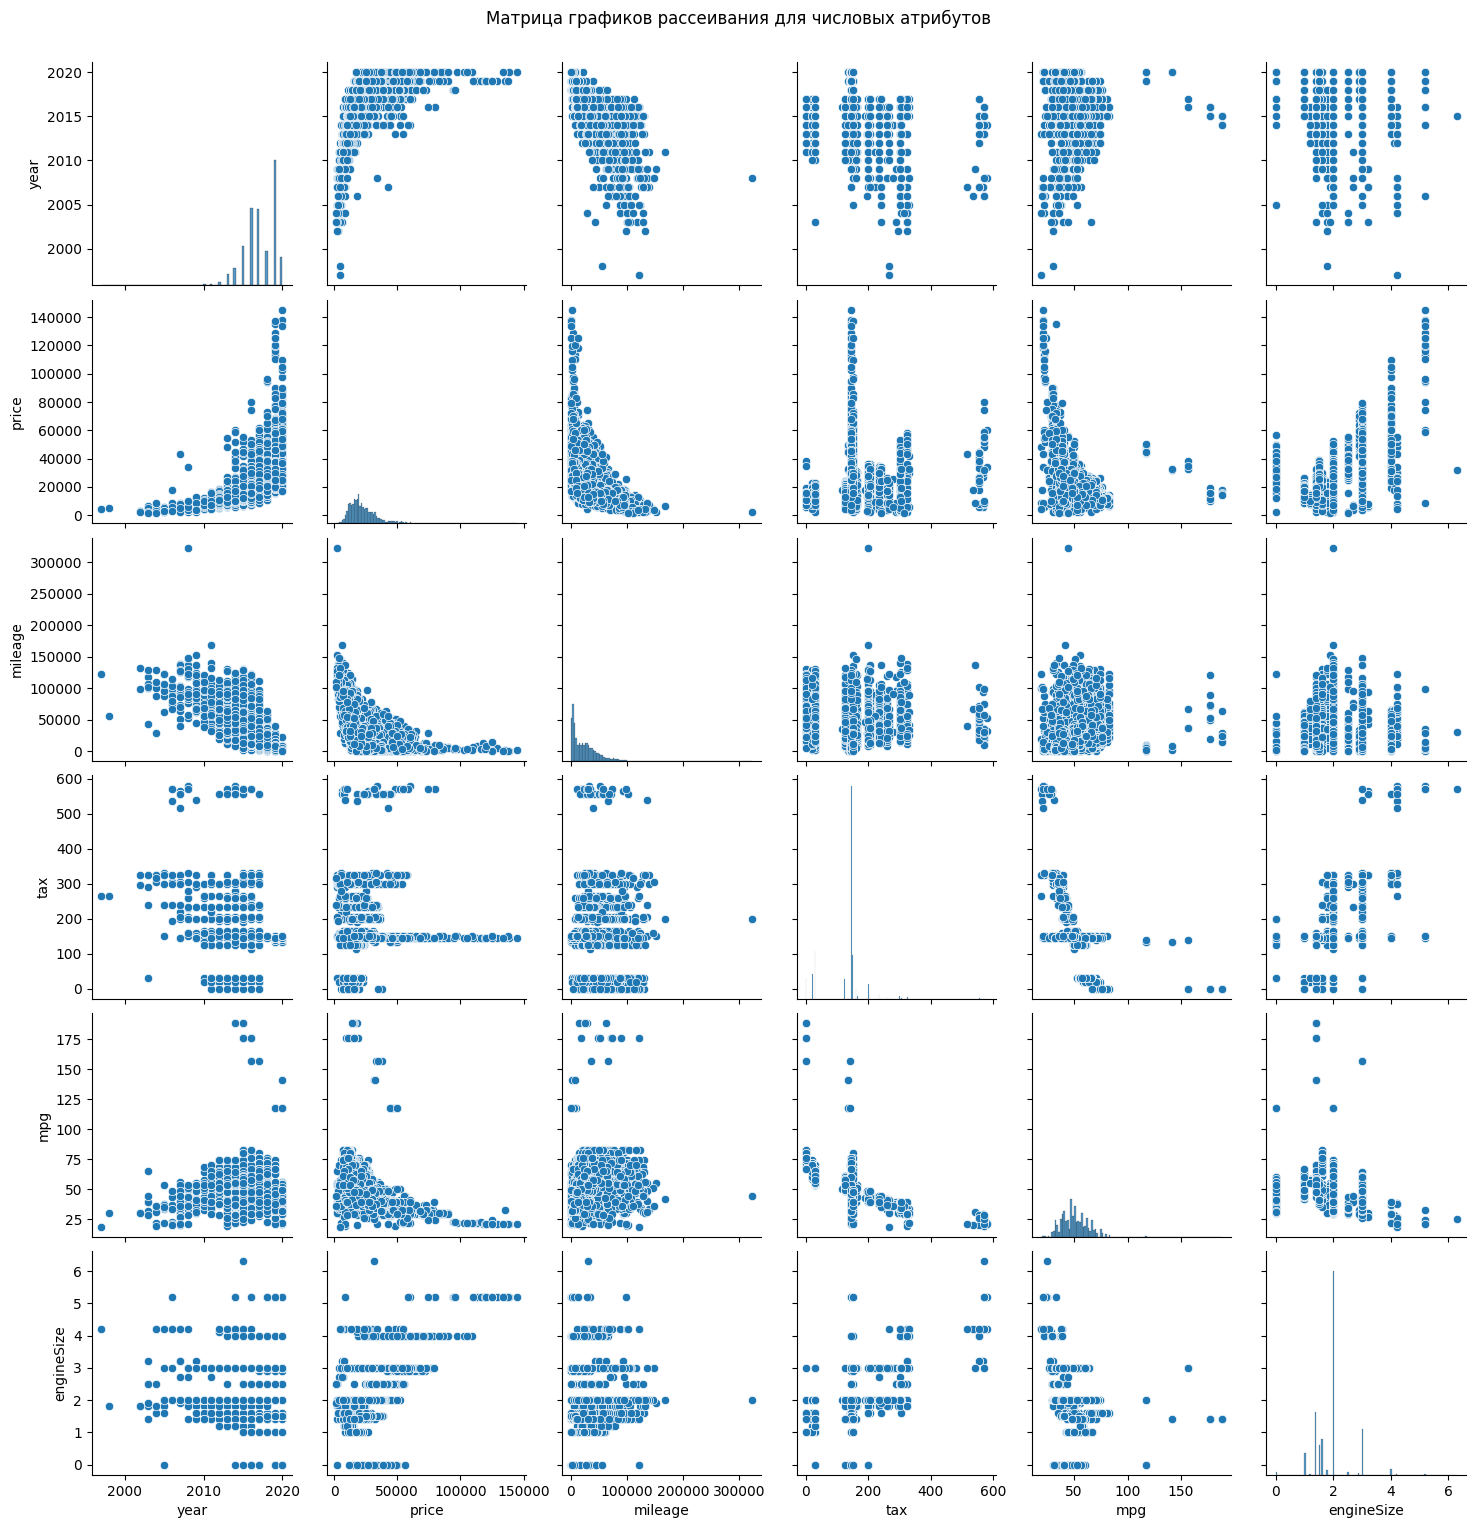

In [98]:
# Построение матрицы графиков рассеивания
import seaborn as sns
sns.pairplot(numeric_df)
plt.suptitle("Матрица графиков рассеивания для числовых атрибутов", y=1.02)
plt.show()

Диаграммы Бокса для выявления выбросов по каждому числовому атрибуту

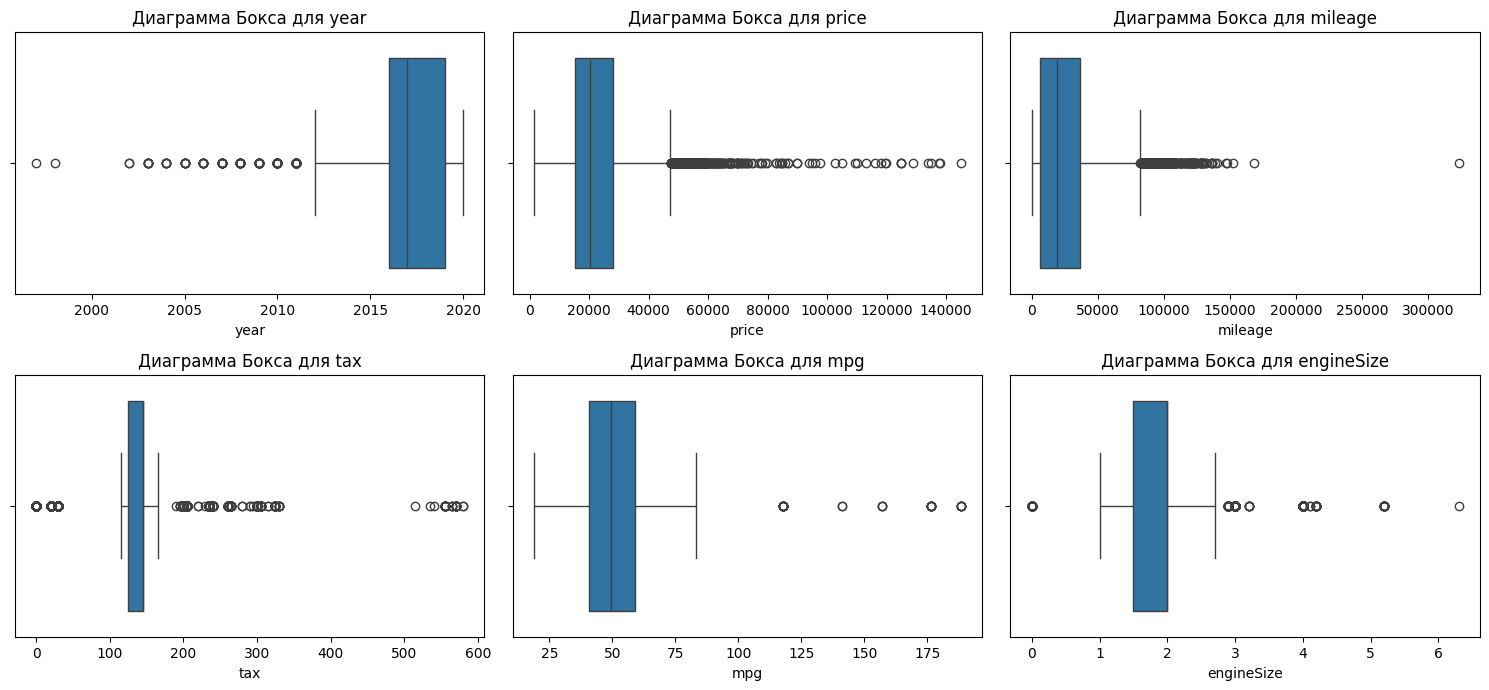

In [99]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=numeric_df[col])
    plt.title(f"Диаграмма Бокса для {col}")
plt.tight_layout()
plt.show()

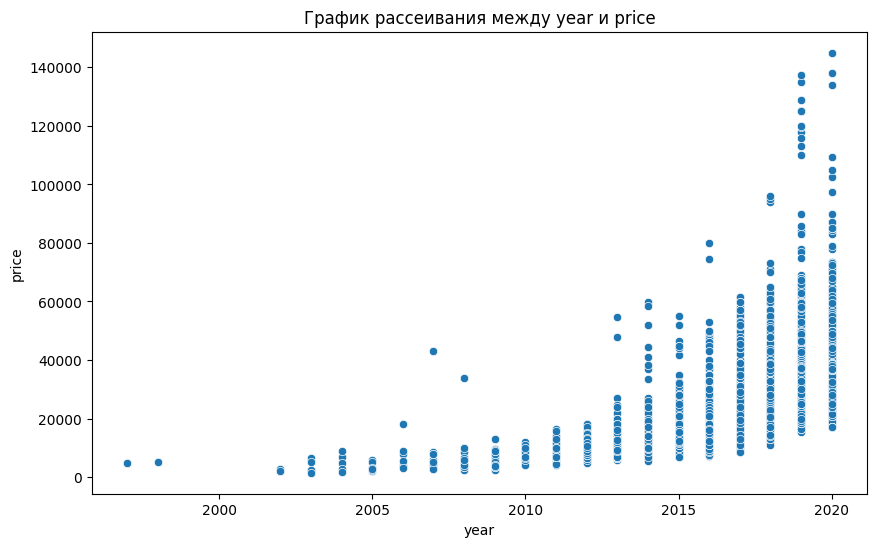

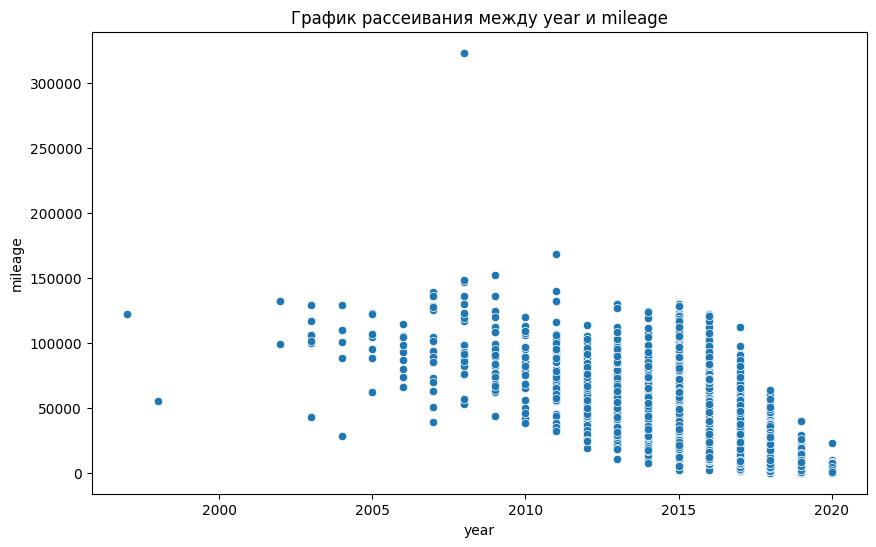

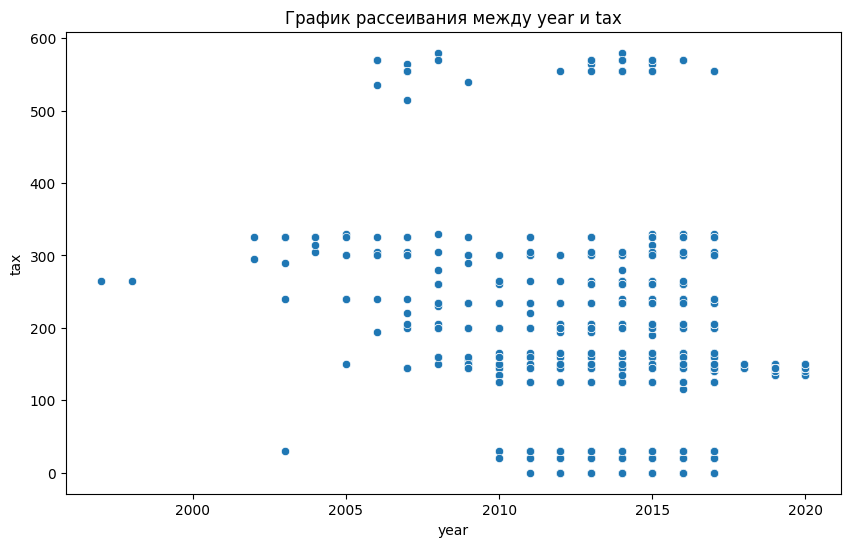

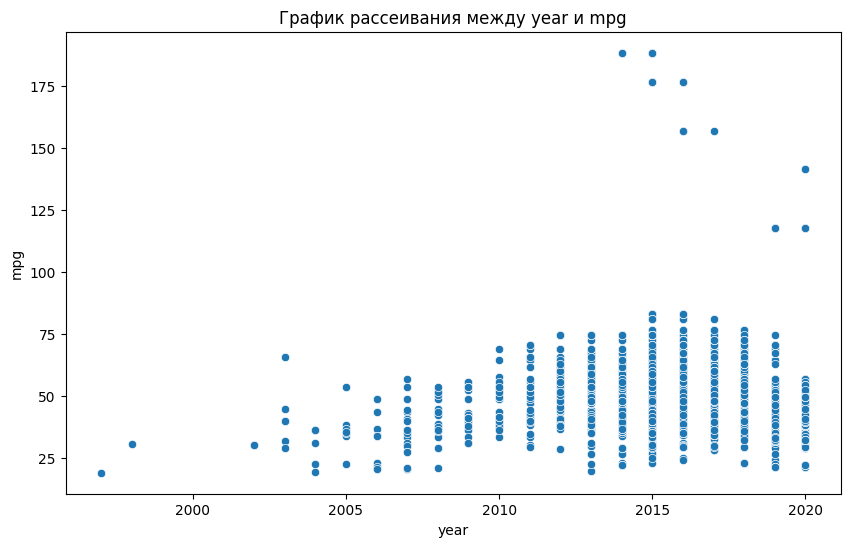

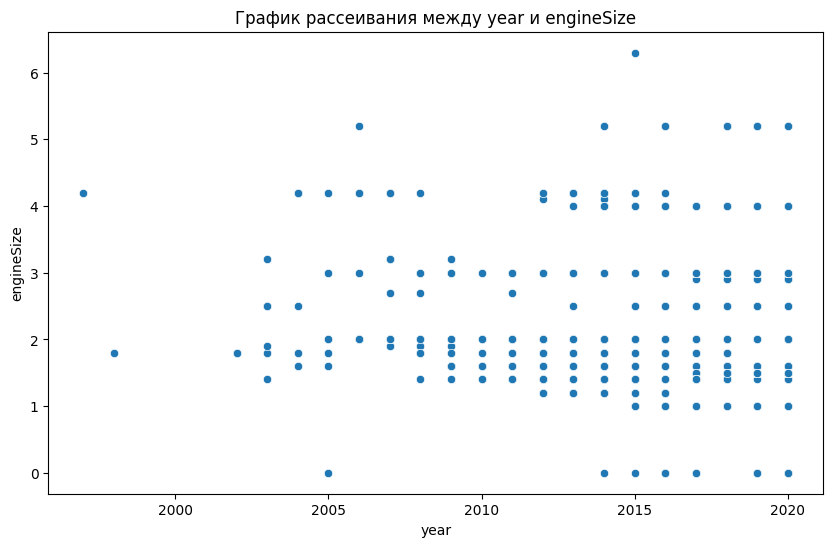

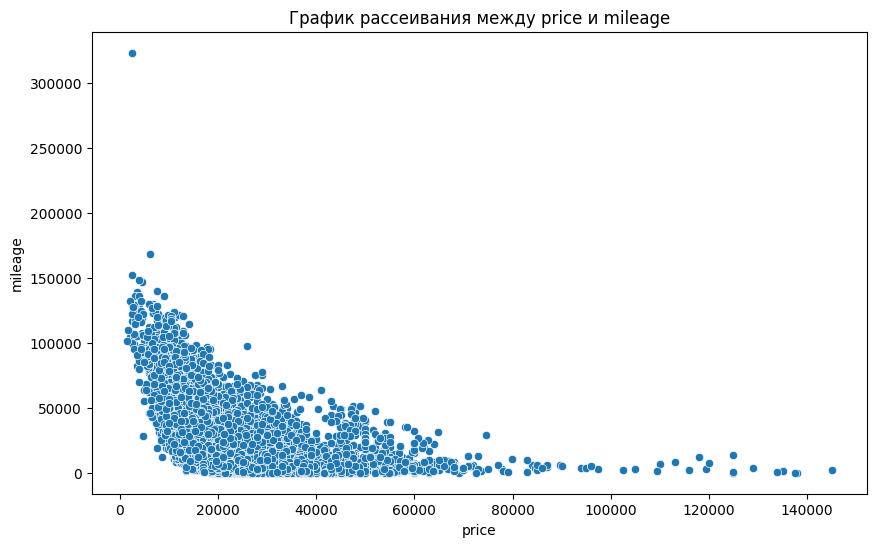

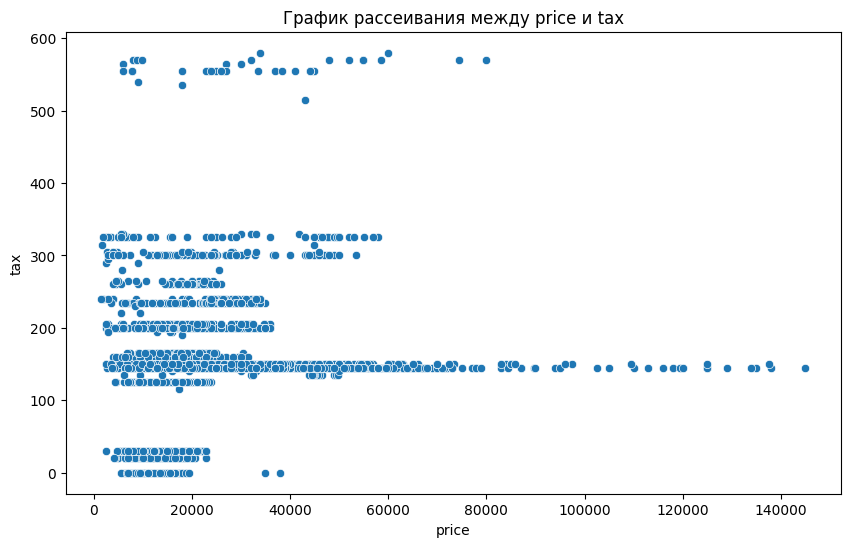

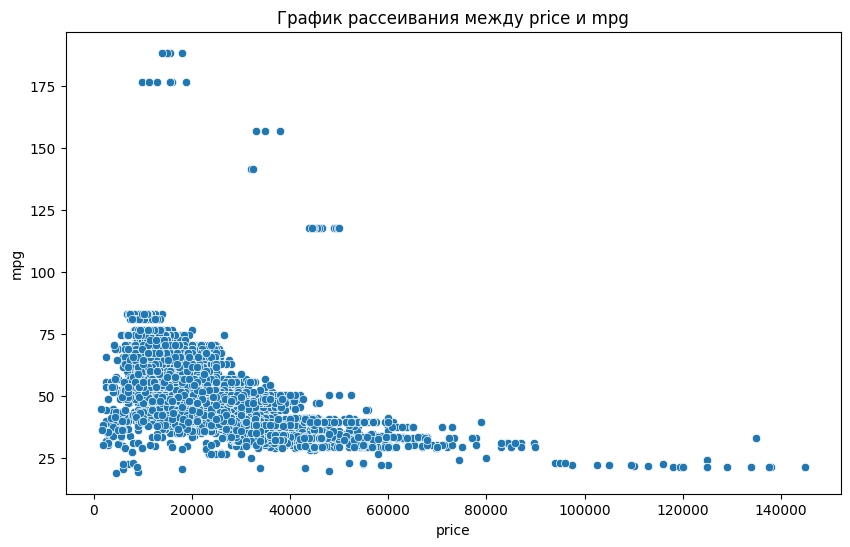

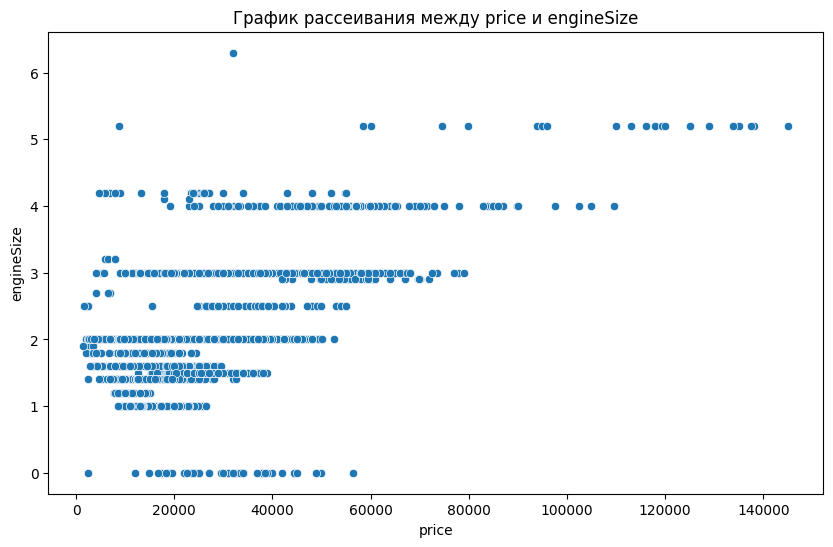

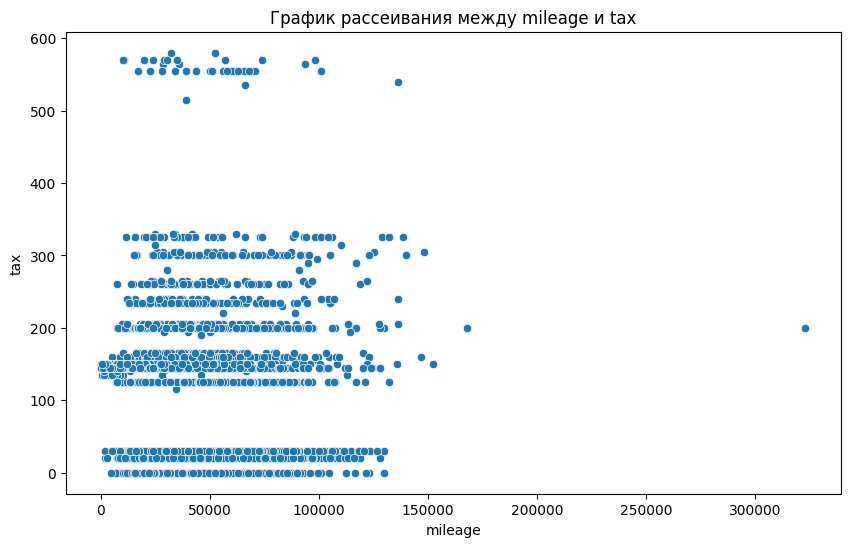

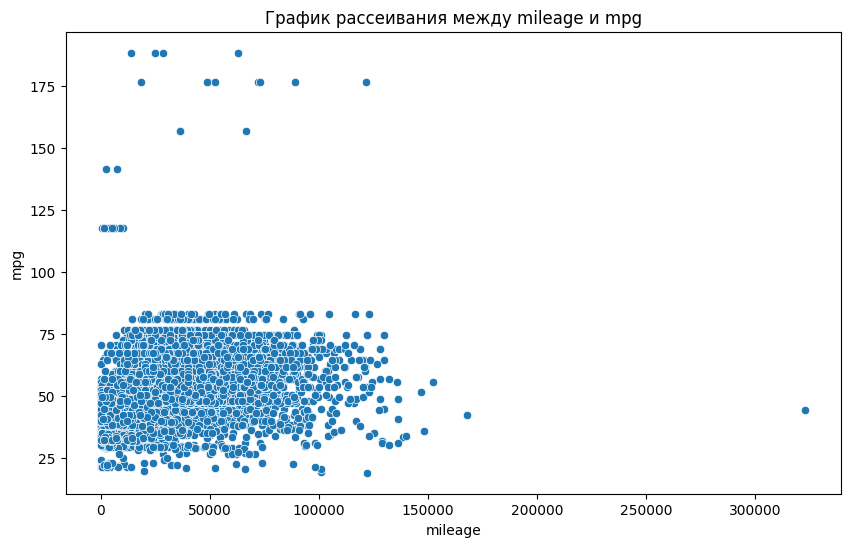

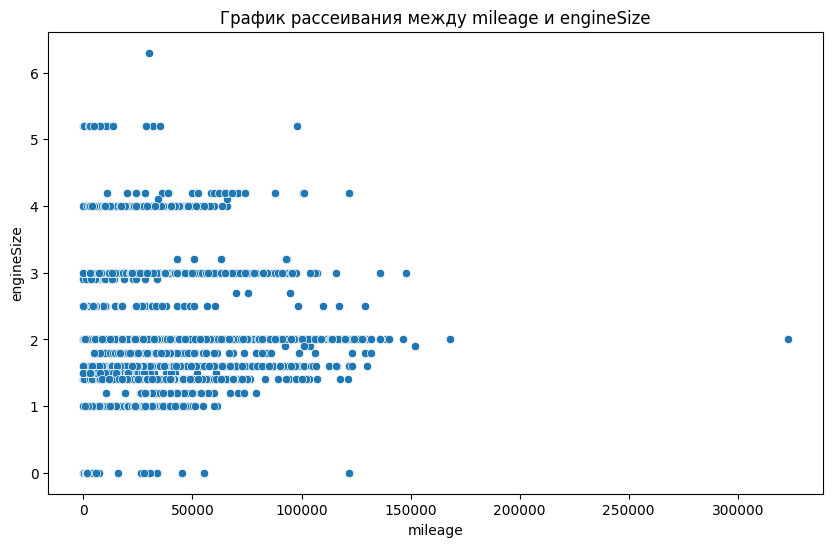

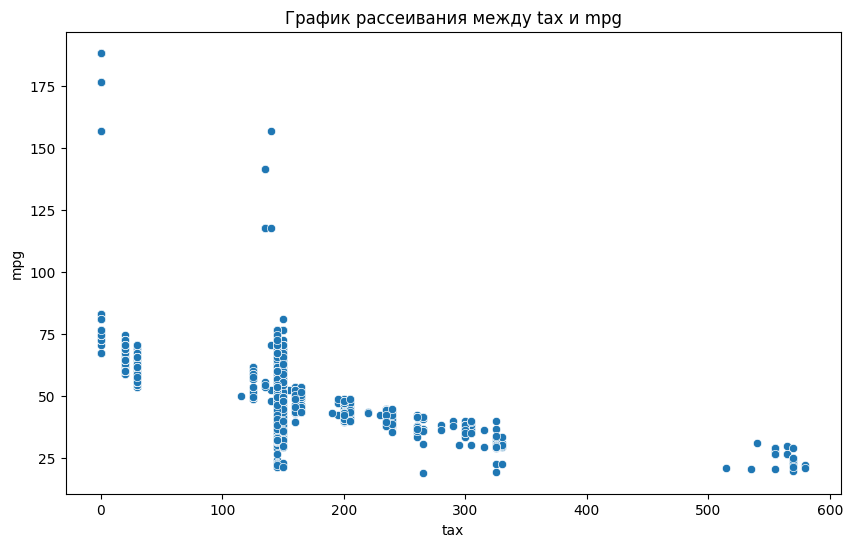

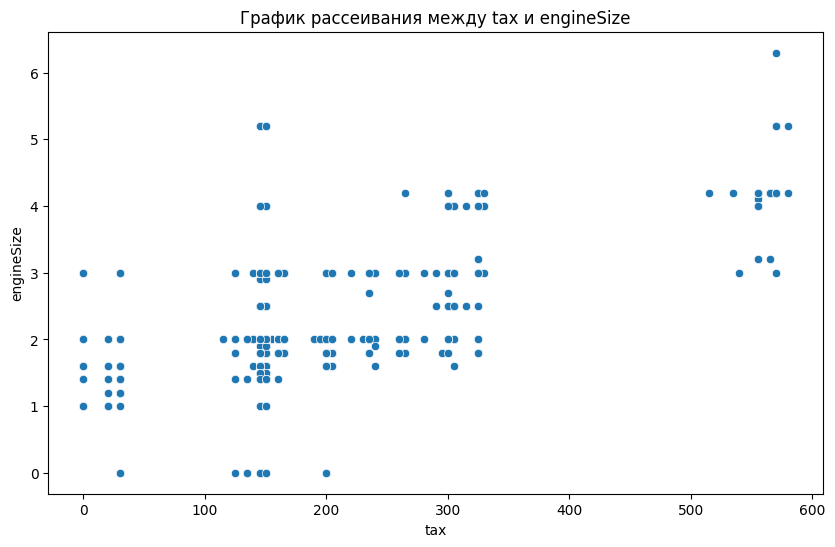

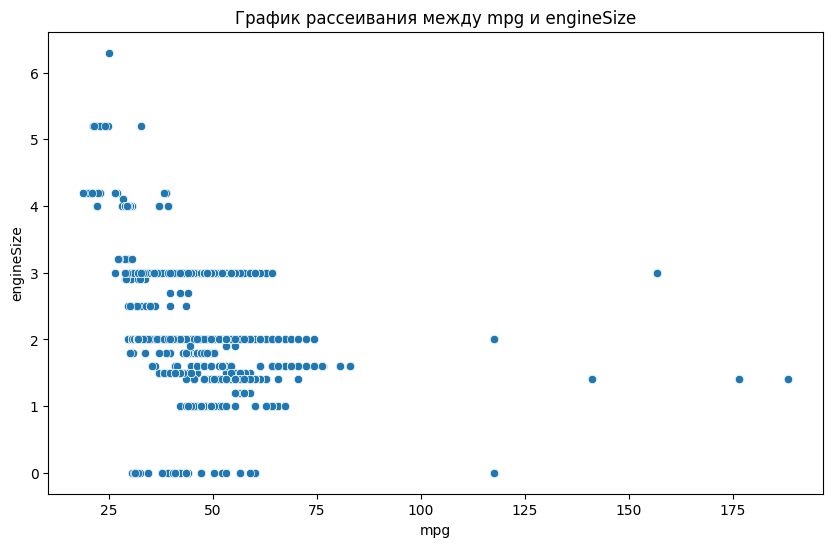

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('D:\\Downloads\\archive\\audi.csv')

# Определение всех числовых атрибутов
num_cols = data.select_dtypes(include=[np.number]).columns

# Построение графиков рассеивания между всеми парами числовых атрибутов
for i in range(len(num_cols)):
    for j in range(i + 1, len(num_cols)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=data, x=num_cols[i], y=num_cols[j])
        plt.title(f'График рассеивания между {num_cols[i]} и {num_cols[j]}')
        plt.xlabel(num_cols[i])
        plt.ylabel(num_cols[j])
        plt.show()


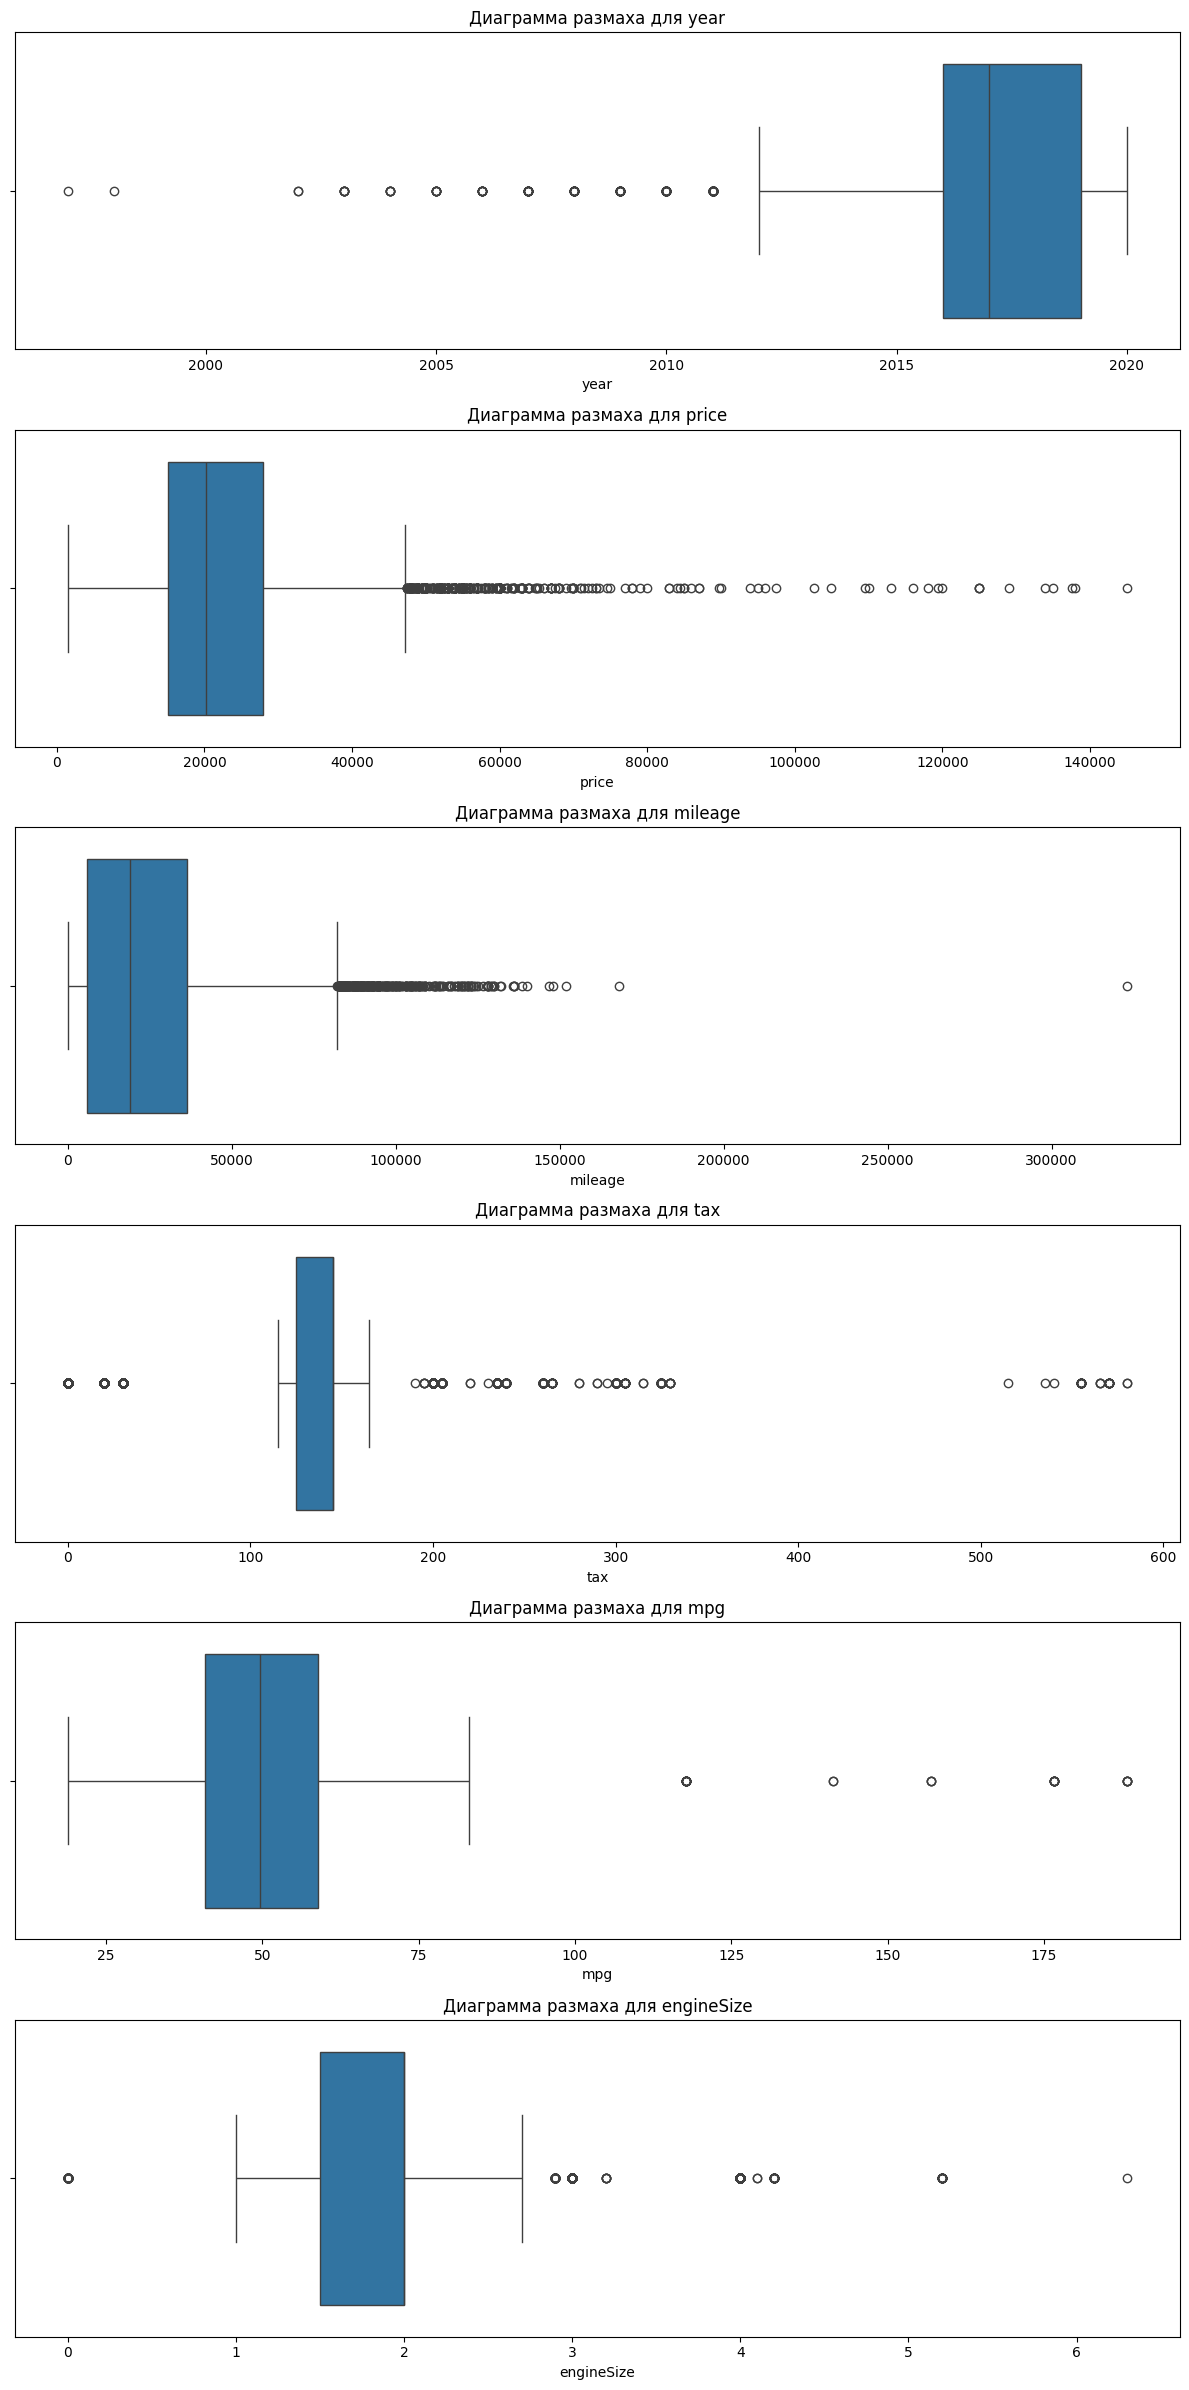

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение диаграмм размаха для всех числовых атрибутов
num_cols = data.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, len(num_cols) * 4))  # Установка общего размера фигуры для всех графиков
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)  # Создание подграфиков
    sns.boxplot(data=data, x=col)
    plt.title(f'Диаграмма размаха для {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()
